## **EDA :** Customer Churn

#### _Customer Churn Dataset_

🟢 `complete`

---

1. **Identification générale**
    * Structure
    * Valeurs cibles
    * Types de valeurs
    * Valeurs manquantes ou défectueuses
    * Préparation
    * Conclusion
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
3. **Analyse bivariée**
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
    * Liens corrélation
4. **Finalisation**
    * Conclusion
    * Traitements

**Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

**Notebook setup**

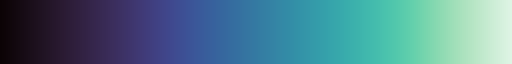

In [3]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
churn_c = [
    '#b8e600', # Green
    '#e60073' # Magenta
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, icefire ...
sns.color_palette("mako", as_cmap=True)

**Customer Churn**

(_no url_)

<img src="./_datasets/features_explanation.png" alt="features explanation" title="Features in Dataset : explanation" width="960" height="426">

In [4]:
churn_file_path = './_datasets/churn_data.xlsx'
churn_data = pd.read_excel(churn_file_path, sheet_name="Churn Modelling")

churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Notes**
* `CreditScore`, _creditworthiness_ : la "solvabilité"
* `HasCrCard` : est une quantité, pas une valeur binaire 
* `Balance` : le solde sur le compte bancaire
* `Age` : correspond à l'age au moment du départ

---
### **1.** Identification générale

_Stade intuitif de l'analyse, et basé sur l'expérience_

##### **1.1** - Structure

In [4]:
# (!) - 10,000 rows and 14 columns
churn_data.shape

(10000, 14)

In [5]:
# (!) - Multi type data and 0 non-null assumed
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### **1.2** - Valeurs cibles

In [6]:
# (!) - Target is 'Exited', assumed 1 = Yes, 0 = No
churn_data['Exited'].unique()

array([1, 0], dtype=int64)

##### **1.3** - Types de valeurs

In [8]:
# (!) - 3 types of data
pd.DataFrame({
    'Quantité de valeurs': churn_data.dtypes.value_counts()
})

,Quantité de valeurs
int64,9
object,3
float64,2


In [9]:
# (!) - 'HasCrCard' and 'IsActiveMember' might be categoricals
pd.DataFrame({
    'Valeurs minimums (int)': churn_data.select_dtypes(np.int64).min(),
    'Valeurs maximums (int)': churn_data.select_dtypes(np.int64).max()
}, dtype=np.int64)

,Valeurs minimums (int),Valeurs maximums (int)
RowNumber,1,10000
CustomerId,15565701,15815690
CreditScore,350,850
Age,18,92
Tenure,0,10
NumOfProducts,1,4
HasCrCard,0,1
IsActiveMember,0,1
Exited,0,1


In [10]:
# (!) - Large range of floating' values
pd.DataFrame({
    'Valeurs minimums (float)': churn_data.select_dtypes(np.float64).min(),
    'Valeurs maximums (float)': churn_data.select_dtypes(np.float64).max()
}, dtype=np.float64)

,Valeurs minimums (float),Valeurs maximums (float)
Balance,0.00,250898.09
EstimatedSalary,11.58,199992.48


In [14]:
# (!) - Columns 'Geography' and 'Gender' might be categoricals
churn_data.select_dtypes(np.object_)

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


##### **1.4** - Valeurs défectueuses

Valeurs nulles

In [9]:
# (!) - No Null
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Valeurs uniques

In [21]:
# (!) - Only 2932 unique values for 'Surname' in a Dataset of 10,000 rows
churn_data.select_dtypes(np.object_).nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [11]:
# (!) - Only 3 countries
churn_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Valeurs dupliquées

In [37]:
# (!) - No duplicated Ids
churn_data.loc[churn_data.duplicated('CustomerId'), ['CustomerId', 'Gender', 'Age']]

,CustomerId,Gender,Age


In [22]:
# (!) - 7068 duplicated values by 'Surname'
churn_data.loc[churn_data.duplicated('Surname'), ['CustomerId', 'Surname', 'Gender', 'Age', 'Tenure', 'Balance']]

,CustomerId,Surname,Gender,Age,Tenure,Balance
89,15767954,Osborne,Female,28,3,81623.67
94,15676966,Capon,Male,42,4,0.00
102,15580146,Hung,Male,31,9,82674.15
114,15609618,Fanucci,Male,28,9,154475.54
122,15690673,Cameron,Female,39,6,0.00
...,...,...,...,...,...,...
9995,15606229,Obijiaku,Male,39,5,0.00
9996,15569892,Johnstone,Male,35,10,57369.61
9997,15584532,Liu,Female,36,7,0.00
9998,15682355,Sabbatini,Male,42,3,75075.31


In [16]:
# (!) - 'Smith' is the most common
pd.DataFrame({
    'Quantités de duplicata': churn_data['Surname'].value_counts().sort_values(ascending=False).head(10)
})

,Quantités de duplicata
Smith,32
Martin,29
Scott,29
Walker,28
Brown,26
Yeh,25
Shih,25
Genovese,25
Maclean,24
Wright,24


In [49]:
# (!) - Example with 'Smith', people's info are different
churn_data.loc[churn_data['Surname'] == 'Smith', ['CustomerId', 'Surname', 'Gender', 'Age', 'Tenure', 'Balance', 'Geography']].sort_values('Age')

,CustomerId,Surname,Gender,Age,Tenure,Balance,Geography
1064,15699598,Smith,Female,20,4,0.00,France
7017,15767729,Smith,Male,25,5,182876.88,Spain
479,15797736,Smith,Male,29,4,80262.60,France
...,...,...,...,...,...,...,...
234,15704769,Smith,Female,67,5,113978.97,France
6230,15616954,Smith,Male,71,4,0.00,France
5671,15805104,Smith,Female,73,6,0.00,France


In [17]:
# (!) - The Smiths are distinct poeple
pd.DataFrame({
    'Valeurs distinctes pour "Smith"': churn_data.loc[churn_data['Surname'] == 'Smith', ['Gender', 'Age', 'Tenure', 'Geography']].nunique()
})

,"Valeurs distinctes pour ""Smith"""
Gender,2
Age,23
Tenure,10
Geography,3


##### **1.5** - Préparation

* Faciliter la manipulation et la **visualisation** des données

In [5]:
# Delete useless columns (even for ML)
churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

# Set categories
no_yes_v = {
    0: 'No',
    1: 'Yes'
}

# Copy and apply modifications for visualization enhancement
churn_df = churn_data.copy()
churn_df.rename(columns={'HasCrCard': 'HasCreditCard'}, inplace=True)
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].map(no_yes_v)
churn_df['Exited'] = churn_df['Exited'].map(no_yes_v)

churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,No,113931.57,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36,7,0.00,1,0,Yes,42085.58,Yes
9998,772,Germany,Male,42,3,75075.31,2,1,No,92888.52,Yes
9999,792,France,Female,28,4,130142.79,1,1,No,38190.78,No


In [5]:
# (!) - Extract column names for variables
continous = churn_df.select_dtypes(np.float64).columns.to_list() + ['Age', 'CreditScore']

discretes = ['Tenure', 'NumOfProducts', 'HasCreditCard']

categoricals = churn_df.select_dtypes(np.object_).columns.to_list()
categoricals.remove('Exited')

display(
    continous,
    discretes,
    categoricals
)

['Balance', 'EstimatedSalary', 'Age', 'CreditScore']

['Tenure', 'NumOfProducts', 'HasCreditCard']

['Geography', 'Gender', 'IsActiveMember']

##### **1.6** - Conclusion

> —
>
> ✔️ Il n'y a **pas de doublon**, même en considérant les redondances dans `Surname`. Sinon, les clients auraient le même `CustomerId` ; ou seraient vraiment la même personne (cf. `Gender`, `Age`, `Tenure`, `Balance`, `Geography`) ; ou on trouverait une certaine séquence entre `Age` et `Tenure`.
>
> ✔️ Les champs **`RowNumber` et `CustomerId` peuvent être abandonné**. 
>
> ✔️ Le champ **`Surname` peut également être abandonné**. Dans ce dataset, absolument rien ne nous permet de vérifier si deux personnes portant le même nom sont mariés (ou en cohabitation légale). Il est donc impossible de chercher si les départs sont plus ou moins fréquents lorsque deux personnes d'un même couple partage la même banque.
>
> —

---
### **2.** Analyse univariée

##### **2.1** - Cible

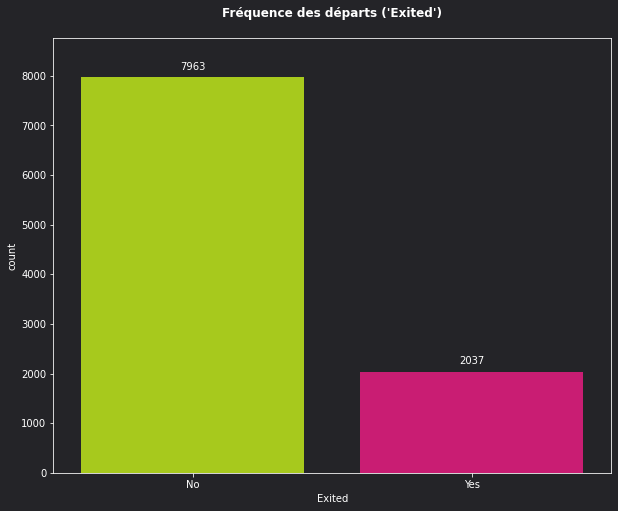

In [8]:
# (!) - Balanced dataset
hgt = churn_df['Exited'].value_counts().max()

plt.figure(figsize=(10, 8))
plt.title("Fréquence des départs ('Exited')\n")
ax = sns.countplot(data=churn_df.sort_values('Exited'), x='Exited', palette=churn_c)
ax.bar_label(ax.containers[0], padding=6)
plt.ylim(top=hgt*1.1)
plt.show()

In [23]:
# (!) - About 20% of costumers left the bank
cnt = churn_df[['Exited']].groupby('Exited').value_counts()
pct = (cnt / churn_df.shape[0]) * 100

pd.DataFrame({
    'Quantité de départs': cnt,
    'Pourcentage des départs': pct
}).reset_index()

,Exited,Quantité de départs,Pourcentage des départs
0,No,7963,79.63
1,Yes,2037,20.37


**Observations**

> —
> 
> ❕ Les personnes ayant quitté la banque représentent 20% du dataset. 
> 
> ❓ _Y a-t-il des éléments ou qui distinguent les personnes qui restent de celles qui partent (`Geography`, `Age`, `CreditScore`, autres) ?_
>
> —

##### **2.2** - Variables quantitatives continues

Fréquences et densités

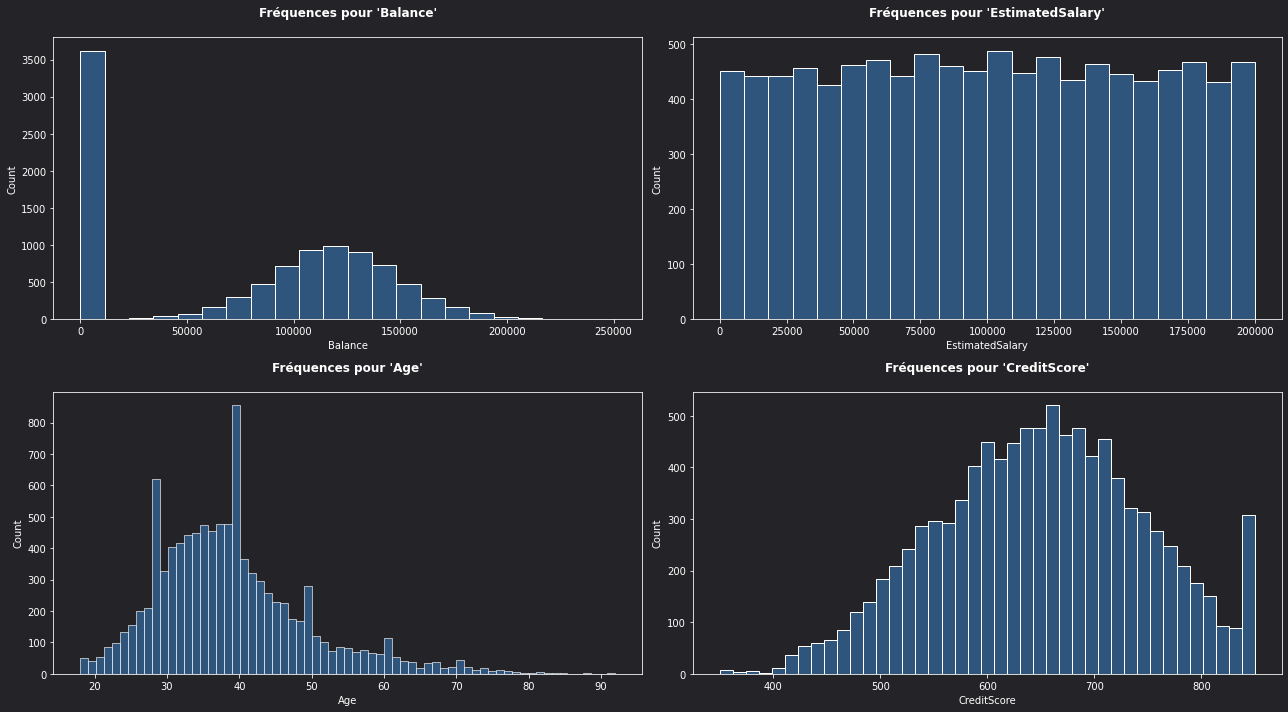

In [19]:
# (!) - 'Balance' is divided in 2, people with 'Balance = 0' and about a normal distribution for others
# (!) - 'EstimatedSalary' is a uniform distrbution and it's likely a mean of salary per person
# (!) - 'Age' distribution has a fat-tail on the right, and some high quantities in decades (esp. at 40)
# (!) - 'CredidScore' is not far from normal distribution, with exceptional high quantities over 850
plt.figure(figsize=(18, 10), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=churn_df, x=col, fill=True, color=default_c)
plt.show()

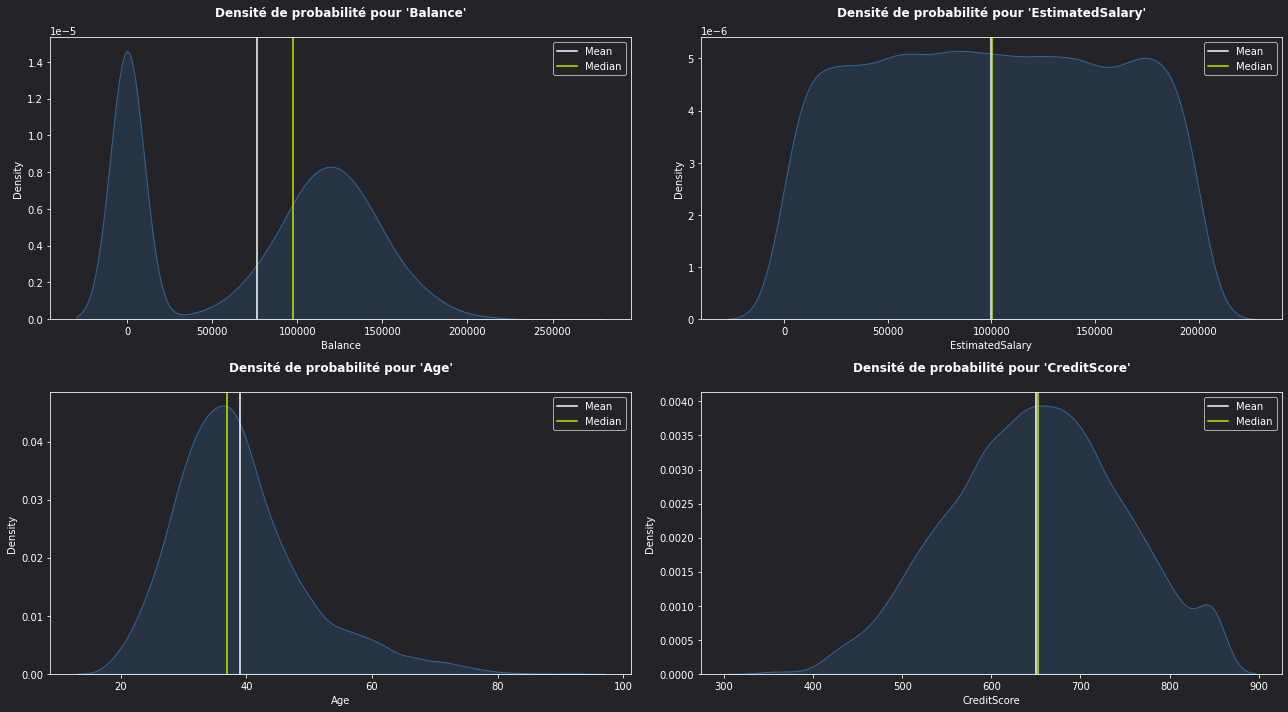

,Balance,EstimatedSalary,Age,CreditScore
mean,76485.889288,100090.239881,38.921800,650.528800
std,62397.405202,57510.492818,10.487806,96.653299
min,0.000000,11.580000,18.000000,350.000000
25%,0.000000,51002.110000,32.000000,584.000000
50%,97198.540000,100193.915000,37.000000,652.000000
75%,127644.240000,149388.247500,44.000000,718.000000
max,250898.090000,199992.480000,92.000000,850.000000


In [20]:
plt.figure(figsize=(18, 10), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Densité de probabilité pour '{col}'\n")
    sns.kdeplot(data=churn_df, x=col, fill=True, color=default_c)
    plt.axvline(churn_df[col].mean(), c=mean_c, label='Mean')
    plt.axvline(churn_df[col].median(), c=median_c, label="Median")
    plt.legend()
plt.show()

churn_df[continous].describe().iloc[1:]

**Observations**

> —
> 
> ❕ `Balance` est divisé en 2, un tier des gens (~3,500 personnes / 10,000) ont un solde bancaire à 0. Le reste se distribue assez “normalement”. `EstimatedSalary` est probablement une moyenne des salaires par personne, la distribution est plutôt uniforme. `Age` est plutôt normal avec une courbe tirée vers la droite (quelques valeurs aberrantes), et quelques hautes fréquences sur les décennies, particulièrement vers 40 ans. 
> 
> ❓ _Est-ce qu'on retrouve une plus grande fréquence des départs dans les personnes avec un `Balance` à 0, ou l'inverse ? Est-ce que les gens qui partent ont un `EstimatedSalary` / un `Age` / un `CreditScore` inférieur ou supérieur à une certaine plage ? Est-ce que les valeurs aberrantes vont provoquer des défauts de prédiction ?_
> 
> — 

Valeurs aberrantes

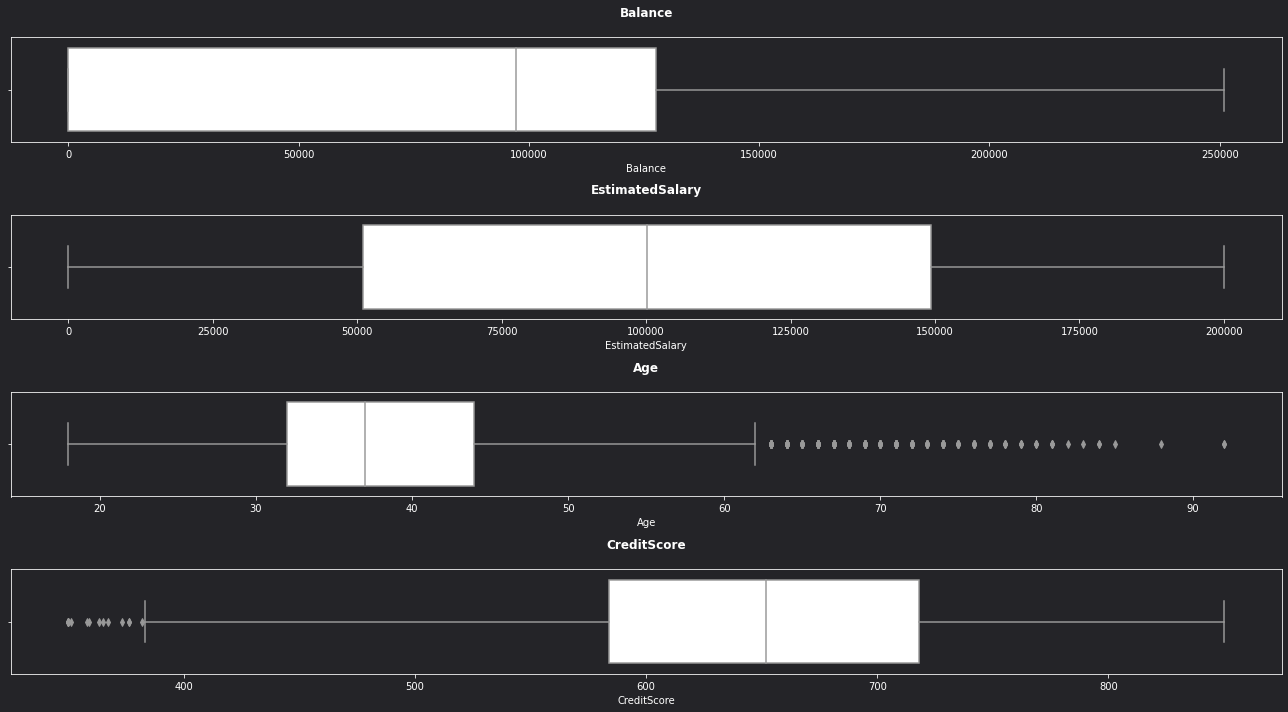

In [29]:
# (!) - Very large dispersion for 'Balance', might be 2 categories of customer combined in one
# (!) - Some outliers in 'Age' and 'CreditScore'
plt.figure(figsize=(18, 10), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(4, 1, i+1)
    plt.title(f"{col}\n")
    sns.boxplot(data=churn_data, x=col, color="#FFFFFF")
plt.show()

In [27]:
# (!) - 'Age' Q1 = 14 and Q3 = 62
# (!) - 'CreditScore' Q1 = 383 and Q3 = 919
q25 = churn_df[['Age', 'CreditScore']].quantile(.25)
q75 = churn_df[['Age', 'CreditScore']].quantile(.75)
iqr = q75 - q25
lows = q25 - (1.5 * iqr)
ups = q75 + (1.5 * iqr)

pd.DataFrame({
    'Limite inférieure': lows,
    'Limite suppérieure': ups,
})

,Limite inférieure,Limite suppérieure
Age,14.0,62.0
CreditScore,383.0,919.0


In [50]:
# (!) - Only 3.6% of dataset has Outliers for 'Age', and with the same distribution of Yes / No for 'Exited' (~20%)
print(f"Personnes dont 'Age' est supérieur à {ups['Age']} :")
age_hi_outliers = churn_df.loc[churn_df['Age'] > ups['Age']].sort_values('Age')

display(age_hi_outliers)

cnt = age_hi_outliers[['Exited']].groupby('Exited').value_counts()
pct = (cnt / churn_df.shape[0]) * 100 

pd.DataFrame({
    'Quantité : Age > 62 ans': cnt,
    'Pourcentage : Age > 62 ans': pct
}).reset_index()

Personnes dont 'Age' est supérieur à 62.0 :


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
769,531,France,Female,63,1,114715.71,1,0,Yes,24506.95,Yes
8562,697,France,Male,63,7,148368.02,1,0,No,118862.08,Yes
2053,850,France,Male,63,8,169832.57,1,0,No,184107.26,Yes
...,...,...,...,...,...,...,...,...,...,...,...
2458,513,Spain,Male,88,10,0.00,2,1,Yes,52952.24,No
6443,753,France,Male,92,3,121513.31,1,0,Yes,195563.99,No
6759,705,France,Male,92,1,126076.24,2,1,Yes,34436.83,No


,Exited,Quantité : Age > 62 ans,Pourcentage : Age > 62 ans
0,No,286,2.86
1,Yes,73,0.73


In [51]:
# (!) - Only 0.15% of dataset has Outliers for 'CreditScore', but 100% of them left the Bank 
print(f"Personnes dont 'CreditScore' est inférieur à {lows['CreditScore']} :")
credit_lo_outliers = churn_df.loc[churn_df['CreditScore'] < lows['CreditScore']].sort_values('CreditScore')

display(credit_lo_outliers)

cnt = credit_lo_outliers[['Exited']].groupby('Exited').value_counts()
pct = (cnt / churn_df.shape[0]) * 100

pd.DataFrame({
    'Quantité : CreditScore < 383': cnt,
    'Pourcentage : CreditScore < 383': pct
}).reset_index()

Personnes dont 'CreditScore' est inférieur à 383.0 :


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
1631,350,Spain,Male,54,1,152677.48,1,1,Yes,191973.49,Yes
1838,350,Germany,Male,39,0,109733.20,2,0,No,123602.11,Yes
8723,350,France,Male,51,10,0.00,1,1,Yes,125823.79,Yes
8762,350,France,Female,60,3,0.00,1,0,No,113796.15,Yes
9624,350,France,Female,40,0,111098.85,1,1,Yes,172321.21,Yes
2473,351,Germany,Female,57,4,163146.46,1,1,No,169621.69,Yes
1962,358,Spain,Female,52,8,143542.36,3,1,No,141959.11,Yes
1405,359,France,Female,44,6,128747.69,1,1,No,146955.71,Yes
1193,363,Spain,Female,28,6,146098.43,3,1,No,100615.14,Yes
2579,365,Germany,Male,30,0,127760.07,1,1,No,81537.85,Yes


,Exited,Quantité : CreditScore < 383,Pourcentage : CreditScore < 383
0,Yes,15,0.15


**Observations**

> — 
> 
> ❕ Environ 3.6% du Dataset contient des valeurs aberrantes pour `Age`. Mais la répartition de 'Yes' / 'No' pour `Exited` demeure la même, à savoir ~20%. En revanche, 100% des gens dont la valeur pour `CreditScore` est aberrante a quitté la banque. Mais cette quantité ne représente que 0.15 % du Dataset.
> 
> ✔️ Les **valeurs aberrantes ne présentent aucun risque** pour la prédiction.
> 
> —

##### **2.3** - Variables quantitatives discrètes

Fréquence

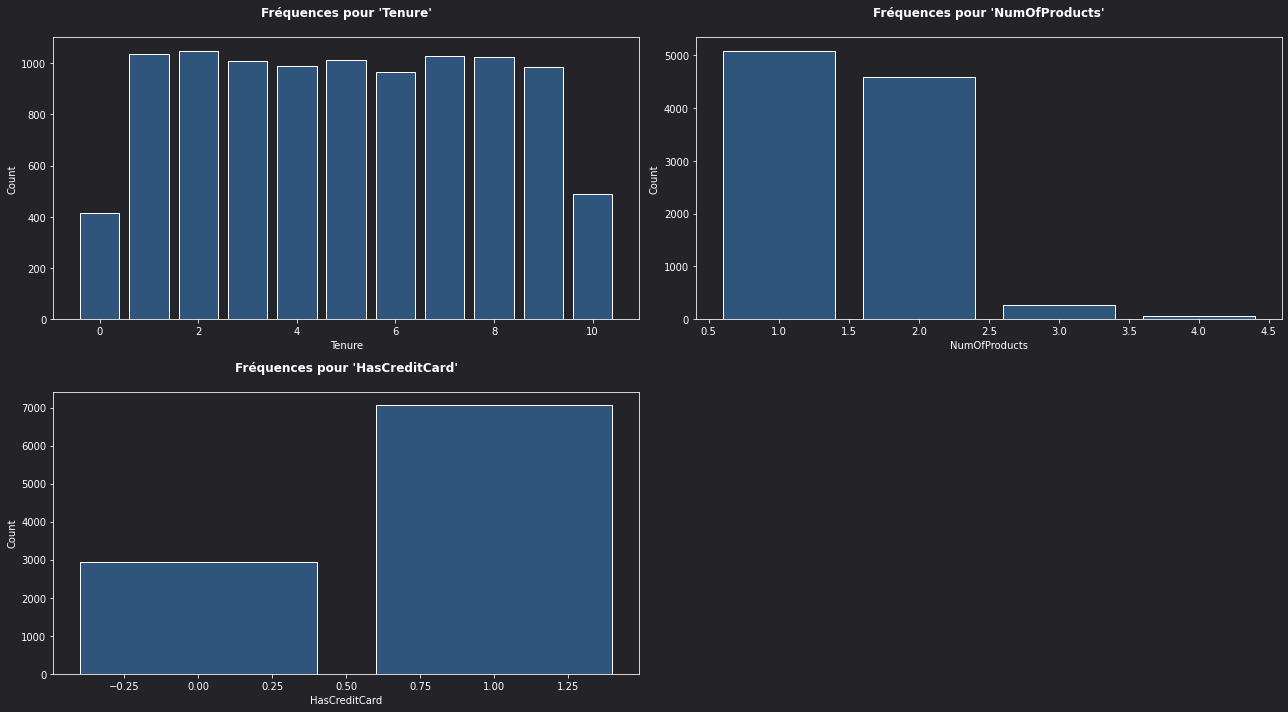

In [38]:
# (!) - 'Tenure' is very uniform, except low frequencies in extreme values
# (!) - 'NumOfProducts' is over 90% for 1 and 2 products combined
# (!) - Only ~30% of customers has no CreditCard
plt.figure(figsize=(18, 10), layout='tight')
for i, col in enumerate(discretes) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=churn_df, x=col, fill=True, discrete=True, shrink=.8, color=default_c)
plt.show()

**Observations**

> —
> 
> ❕ Faible fréquence dans les valeurs extrêmes pour `Tenure`, mais le reste est assez uniforme. La quantité cumulée de clients qui ont 3 ou 4 `NumOfProducts` est inférieure à 10 %. Mais pour le reste, les données se répartissent presque équitablement entre 1 et 2. ~30 % des clients sont a 0 pour `HasCreditCard`. Les autres en ont maximum 1.
> 
> ❓ _Est-ce que les gens qui partent se situent dans la plage inférieure ou suppérieure de `Tenure` ? Combien de temps les clients sont restés avant de quiter la banque ? Compte tenu des faibles fréquences, est-ce que les plages 3 et 4 de `NumOfProducts` seront utiles ? Ne faudrait-il pas les rassembler dans les plages 1 et 2, ou créer simplement une catégorie binaire 2+ ? Y a-t-il une plus grande fréquence des départs chez les clients ayant 0 en `HasCreditCard` ?_ 
> 
> —

##### **2.4** - Variables qualitatives

Fréquence

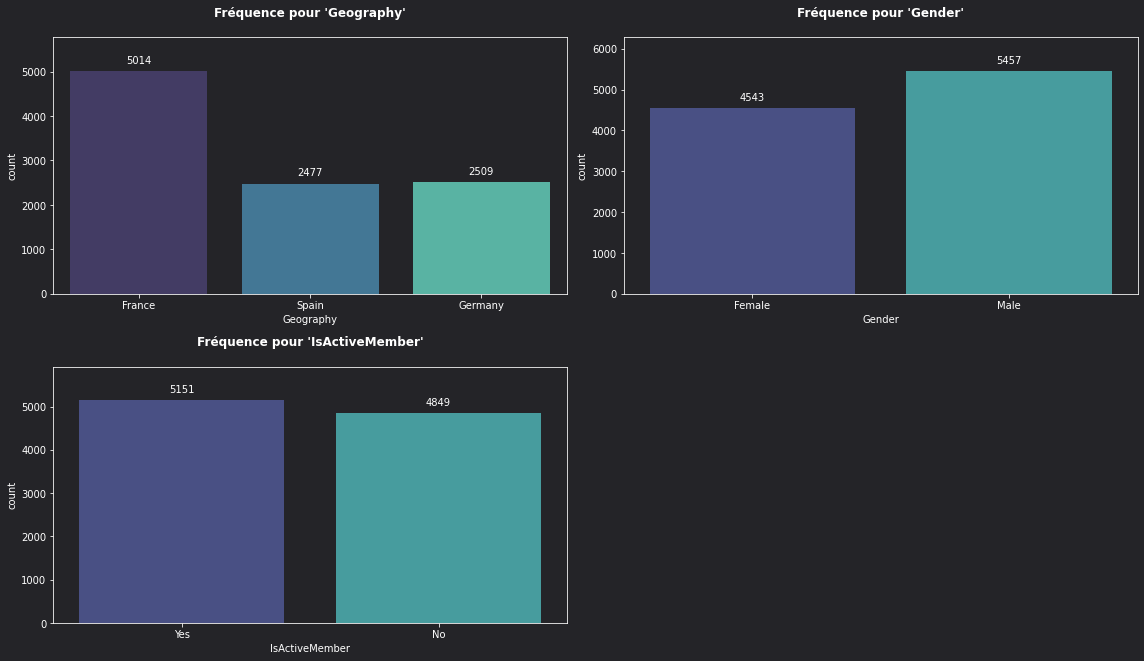

In [41]:
# (!) - 'Geography', 50% of customers in France, Spain and Germany are quite same quantities of customers 
# (!) - 'Gender' and 'IsActiveMember' have nearly the same division, 50%/50%
plt.figure(figsize=(16, 18), layout='tight')
for i, col in enumerate(categoricals) :
    hi_freq = churn_df[col].value_counts().max()
    plt.subplot(4, 2, i+1)
    plt.title(f"Fréquence pour '{col}'\n")
    ax = sns.countplot(data=churn_df, x=col, palette='mako')
    ax.bar_label(ax.containers[0], padding=6)
    plt.ylim(top=hi_freq*1.15)
plt.show()

**Observations**

> —
>
> ❕ La moitié des clients sont en France, l'autre se répartit presque équitablement en Espagne et en Allemagne. Les répartitions pour `Gender` et `IsActiveMember` sont sensiblement équitables, avec une lègère diminution chez les Femmes (différence de 10% entre les deux).
>
> ❓ _Est-ce que la fréquence des départs suit la même répartition pour `Geography` ? Compte tenu des répartitions, y a-t-il une différence significative dans les départs pour ces catégories ?_
> 
> — 

---
### **3.** Analyse bivariée

##### **3.1** - Variables quantitatives continues

Distributions selon la cible

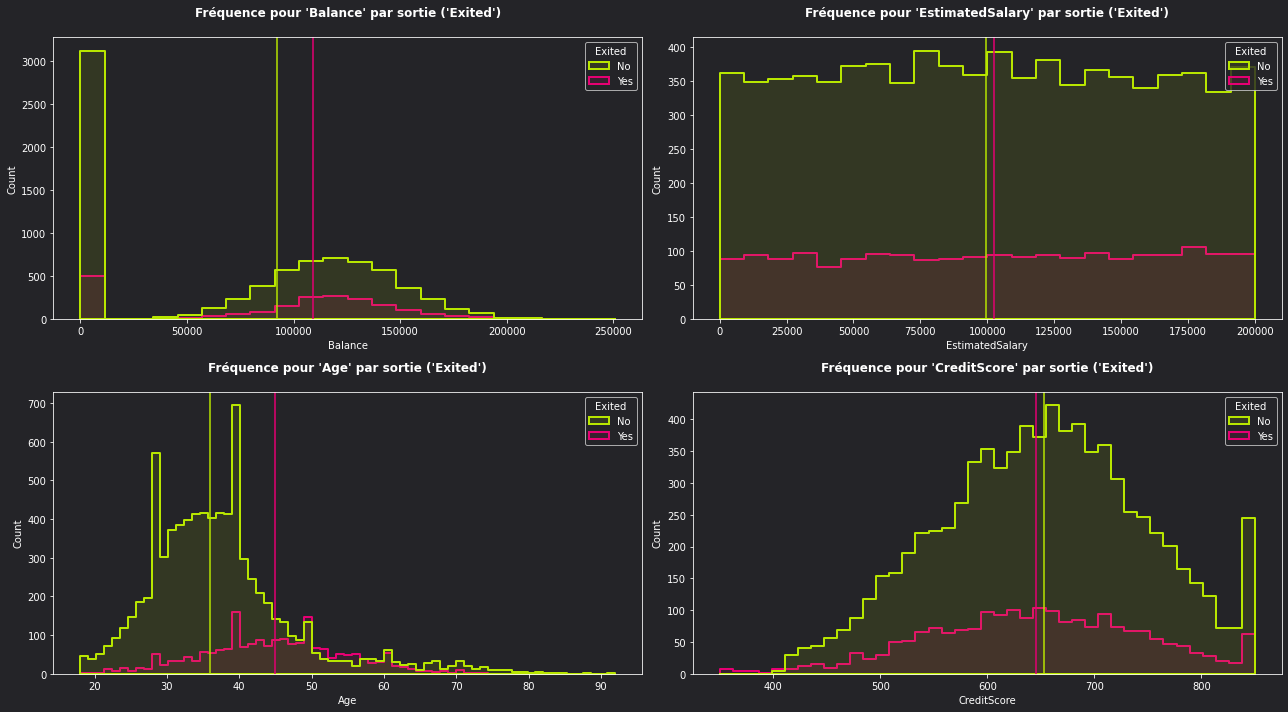

In [83]:
# (!) - 'Exited' Customers have higher medians for 'Balance' and 'Age' 
# (!) - All distributions overlap
plt.figure(figsize=(18, 10), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquence pour '{col}' par sortie ('Exited')\n")
    sns.histplot(data=churn_df, x=col, hue="Exited", hue_order=['No', 'Yes'], alpha=.1, linewidth=2, element="step", palette=churn_c)
    plt.axvline(churn_df.loc[churn_df['Exited'] == 'No', col].median(), c=churn_c[0])
    plt.axvline(churn_df.loc[churn_df['Exited'] == 'Yes', col].median(), c=churn_c[1])

plt.show()

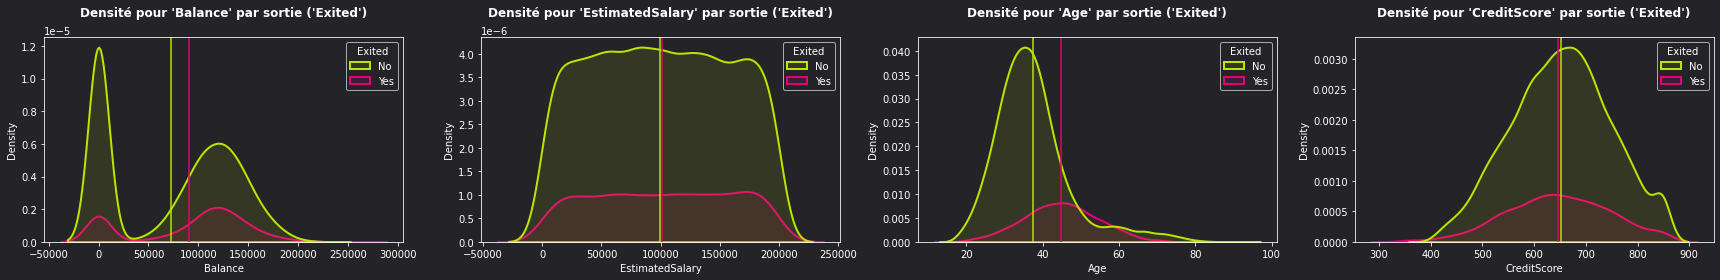

In [84]:
# (!) - Same observation and all densities overlap
plt.figure(figsize=(24, 4), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(1, 4, i+1)
    plt.title(f"Densité pour '{col}' par sortie ('Exited')\n")
    sns.kdeplot(data=churn_df.sort_values('Exited'), x=col, hue='Exited', alpha=.1, linewidth=2, fill=True, palette=churn_c)
    plt.axvline(churn_df.loc[churn_df['Exited'] == 'No', col].mean(), c=churn_c[0])
    plt.axvline(churn_df.loc[churn_df['Exited'] == 'Yes', col].mean(), c=churn_c[1])

plt.show()

Valeurs aberrantes par cible

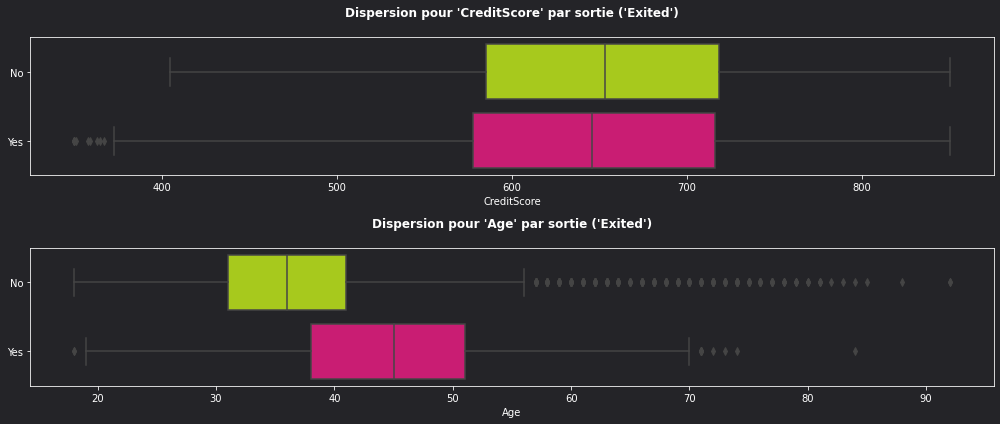

In [44]:
# (!) - No outliers on 'Balance' and 'EstimatedSalary' (cf. 2.1)
# (!) - Low risk from outliers in 'Age' and 'CreditScore' (cf. 2.1)
plt.figure(figsize=(14, 6), layout='tight')
for i, col in enumerate(['CreditScore', 'Age']) :
    plt.subplot(2, 1, i+1)
    plt.title(f"Dispersion pour '{col}' par sortie ('Exited')\n")
    sns.boxplot(data=churn_df.sort_values('Exited'), x=col, y='Exited', palette=churn_c)
    plt.ylabel('')

plt.show()

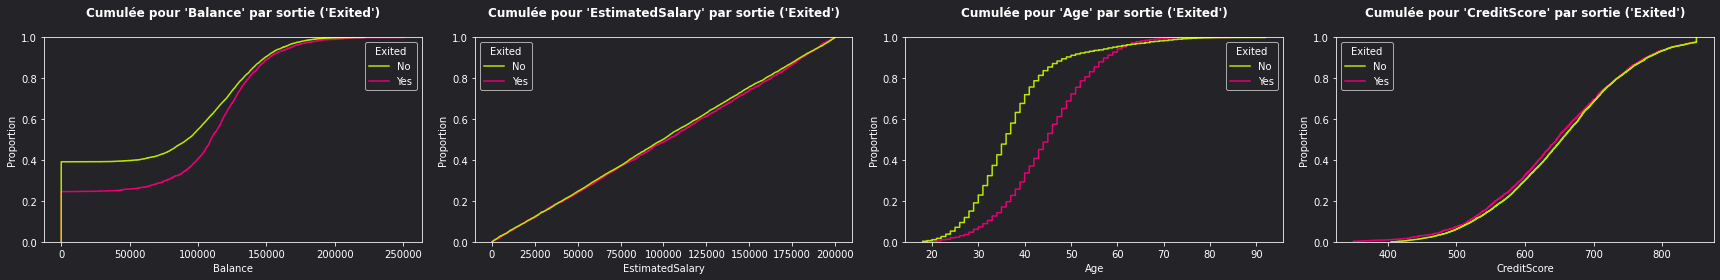

In [94]:
# (!) - No distinction between `Yes` or `No` for `Balance`, 'EstimatedSalary', and 'CreditScore'
# (!) - The median of customers who left is about 45 in 'Age' but the proportion keep the same progression
plt.figure(figsize=(24, 4), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(1, 4, i+1)
    plt.title(f"Cumulée pour '{col}' par sortie ('Exited')\n")
    sns.ecdfplot(data=churn_df, x=col, hue='Exited', hue_order=['No', 'Yes'], palette=churn_c)

plt.show()

In [91]:
# (!) - Only 'Balance' and 'Age' give small difference between `Yes` and `No`
for col in continous :
    display(churn_df[[col, 'Exited']].groupby('Exited').describe())

Balance                                                        \
         count          mean           std  min       25%        50%   
Exited                                                                 
No      7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
Yes     2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

                              
              75%        max  
Exited                        
No      126410.28  221532.80  
Yes     131433.33  250898.09

EstimatedSalary                                                \
                 count           mean           std    min       25%   
Exited                                                                 
No              7963.0   99738.391772  57405.586966  90.07  50783.49   
Yes             2037.0  101465.677531  57912.418071  11.58  51907.72   

                                          
              50%         75%        max  
Exited                                    
No       99645.04  148609.955  199992.48  
Yes     102460.84  152422.910  199808.10

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
No      7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
Yes     2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0

CreditScore                                                           
             count        mean         std    min    25%    50%    75%    max
Exited                                                                       
No          7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
Yes         2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0

Dépendances dans les dispersions

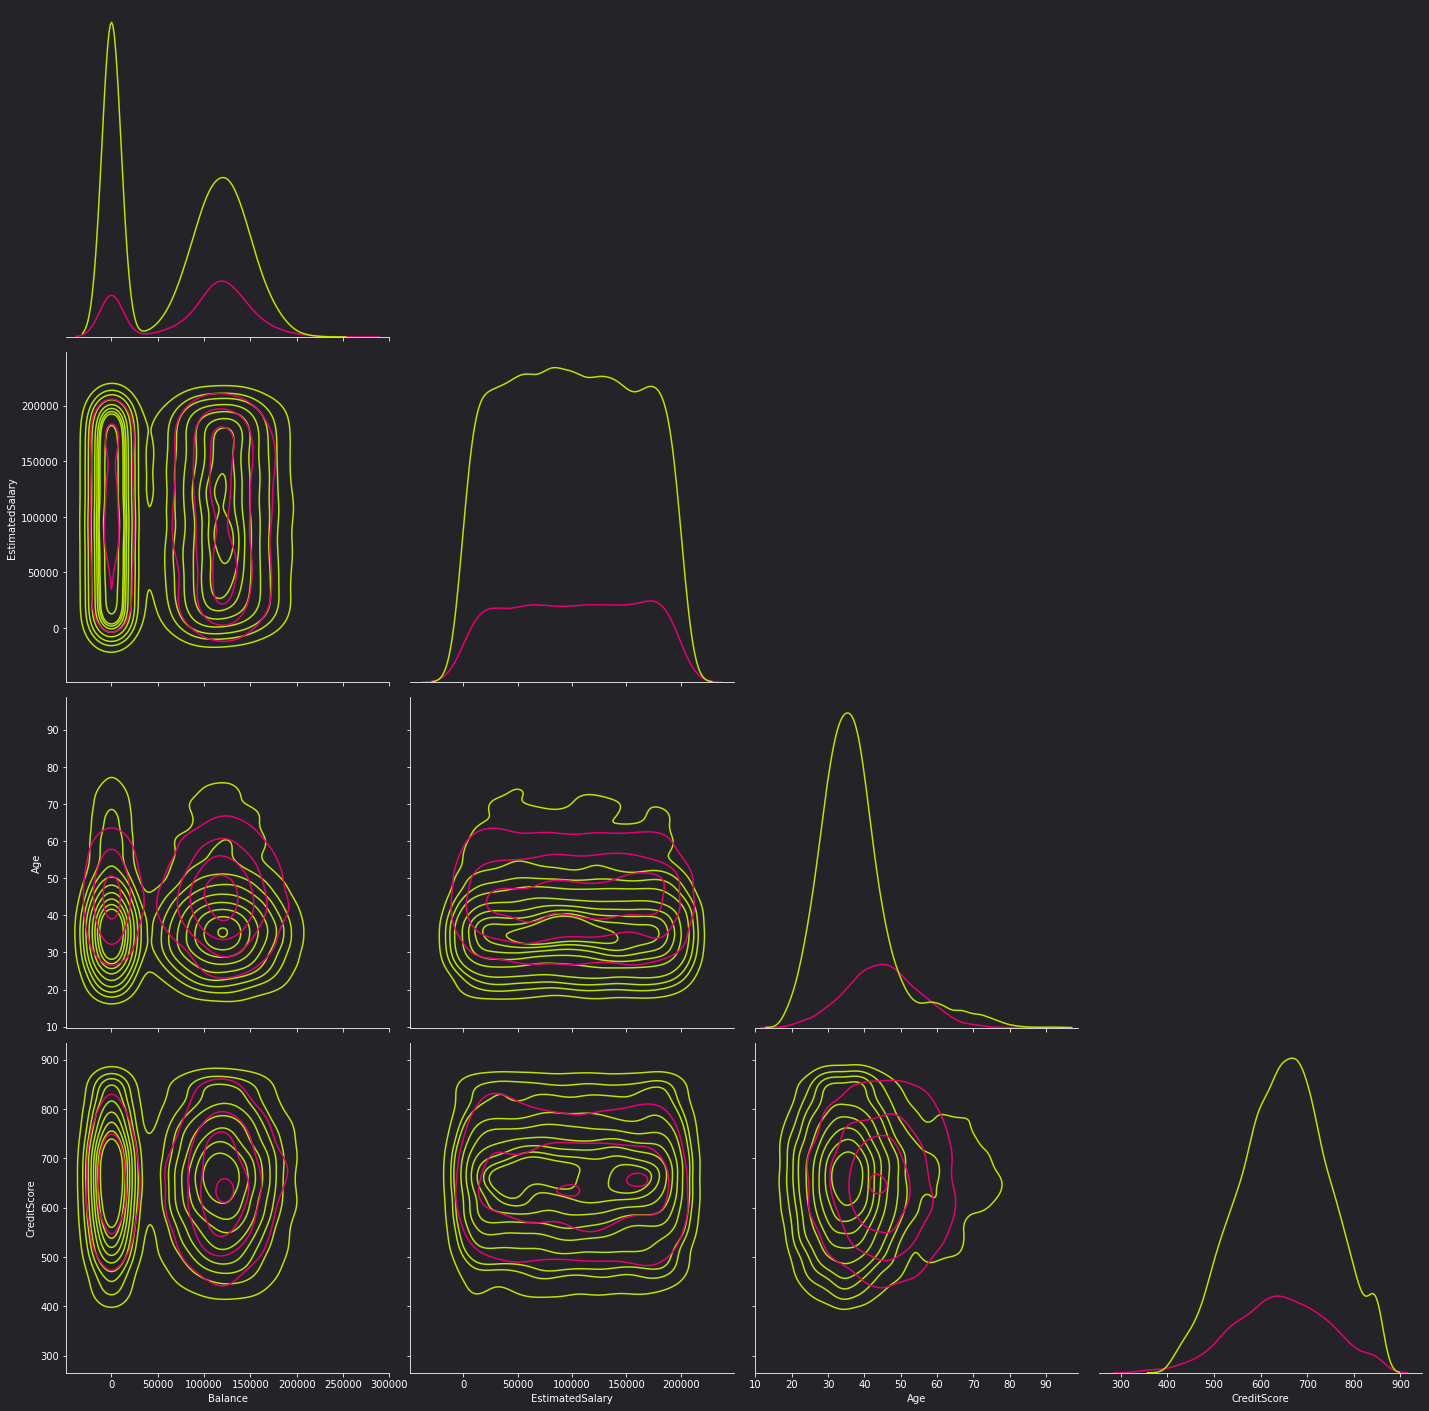

In [75]:
# (!) - Dispersions often overlap 
gd = sns.PairGrid(churn_df[continous + ['Exited']], diag_sharey=False, corner=True, hue='Exited', hue_order=['No', 'Yes'], height=5, palette=churn_c)
gd.map_lower(sns.kdeplot)
gd.map_diag(sns.kdeplot)

In [44]:
# (!) - Shape of points is not clear linear
# (!) - Points are often far from regression line
# (!) - And regression line is often null

# Points dispersion by variables (switch each manualy)
# sns.lmplot(data=churn_df, x='CreditScore', y='Age', height=10, markers=['x'])

In [41]:
# (!) - Same observations by 'Exited'

# Points dispersion by variables distincts by 'Exited' (switch each manualy)
# sns.lmplot(data=churn_df, x='CreditScore', y='Balance', hue='Exited', markers=['x', '.'], height=10, palette=churn_c)

**Observations**

> —
> 
> ❕ Les distributions croiées avec la cible se superposent. Aucune distinction suffisamment claire ne peut être établie visuellement, ou très faiblement avec `Balance` et `Age`. Les dispersions se superposent également. Aucune _droite_ n'apparait clairement dans les nuages de points. Beaucoup de points sont d'ailleurs très éloignés d'une droite de régression.
> 
> —

##### **3.2** - Variables quantitatives discrètes

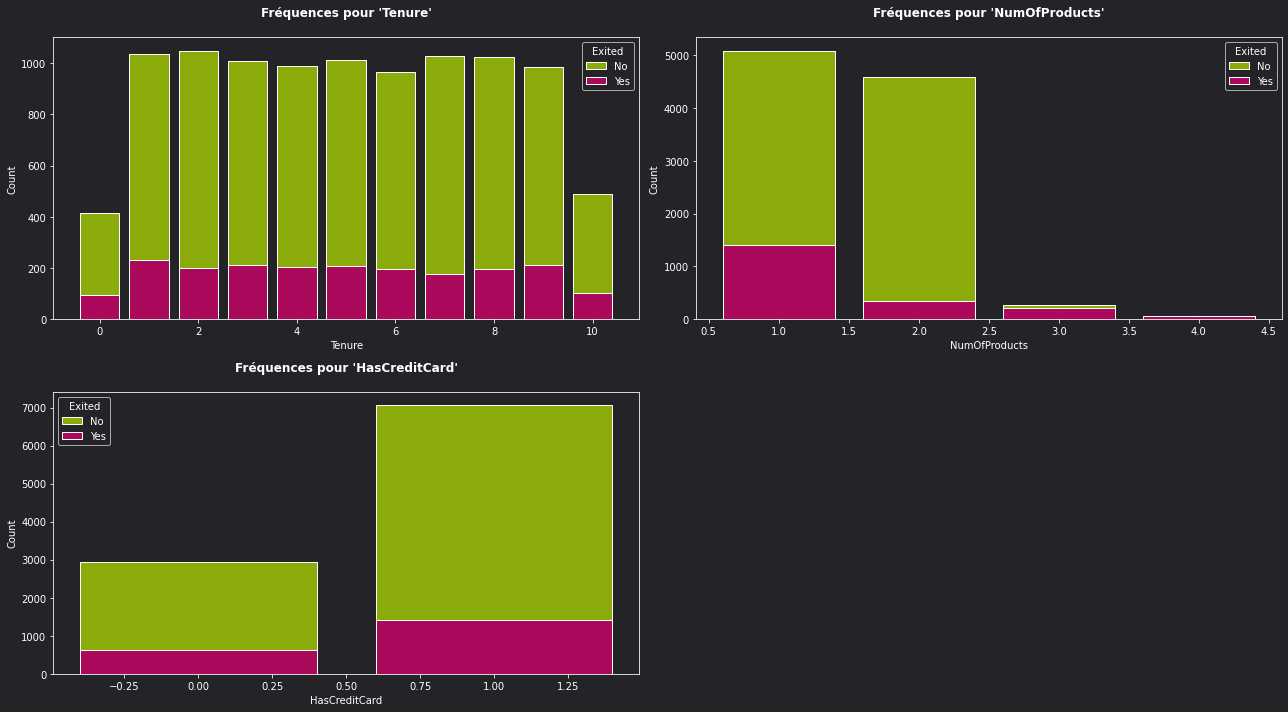

In [151]:
# (!) - 'Tenure' gives same distribution by 'Exited'
# (!) - Most of customers with 'NumOfProducts' over 2 left the bank
# (!) - Proportion by 'Exited' for 'HasCreditCard' is similar
plt.figure(figsize=(18, 10), layout='tight')
for i, col in enumerate(discretes) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=churn_df, x=col, hue='Exited', hue_order=['No', 'Yes'], multiple='stack', alpha=.7, discrete=True, shrink=.8, palette=churn_c)
plt.show()

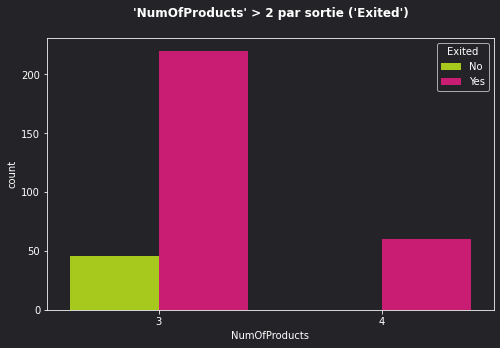

In [79]:
# (!) - 'NumOfProducts' has a significant distinction when over 2
plt.figure(figsize=(8,5))
plt.title(f"'NumOfProducts' > 2 par sortie ('Exited')\n")
sns.countplot(data=churn_df.loc[churn_df['NumOfProducts'] > 2, ['NumOfProducts', 'Exited']], x='NumOfProducts', hue='Exited', hue_order=['No', 'Yes'], palette=churn_c)
plt.show()

**Observations**

> —
> 
> ❕ La distribution pour `Tenure` est sensiblement similaire pour les clients qui partent. Lorsque le `NumOfProducts` est supérieur à 2, les proportions de `Exited` = 'Yes' sont radicalement inversées. La proportion de clients ayant quité la banque est sensiblement la même pour `HasCreditCard`. 
> 
> —

##### **3.3** - Variables qualitatives

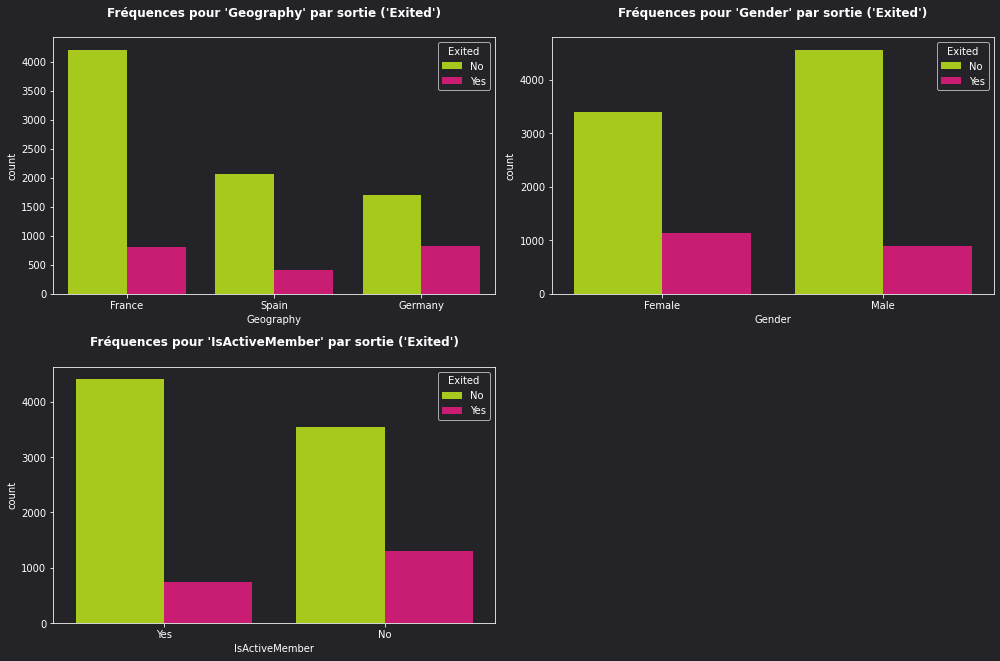

In [131]:
# (!) - Large difference between customers from France who stay and who leave
# (!) - Proportion by 'Exited' for 'Gender' is a bit different
# (!) - Most of customers are still in the bank if 'IsActiveMember' is Yes
plt.figure(figsize=(14, 18), layout='tight')
for i, col in enumerate(categoricals) :
    plt.subplot(4, 2, i+1)
    plt.title(f"Fréquences pour '{col}' par sortie ('Exited')\n")
    sns.countplot(data=churn_df, x=col, hue='Exited', hue_order=['No', 'Yes'], palette=churn_c)
plt.show()

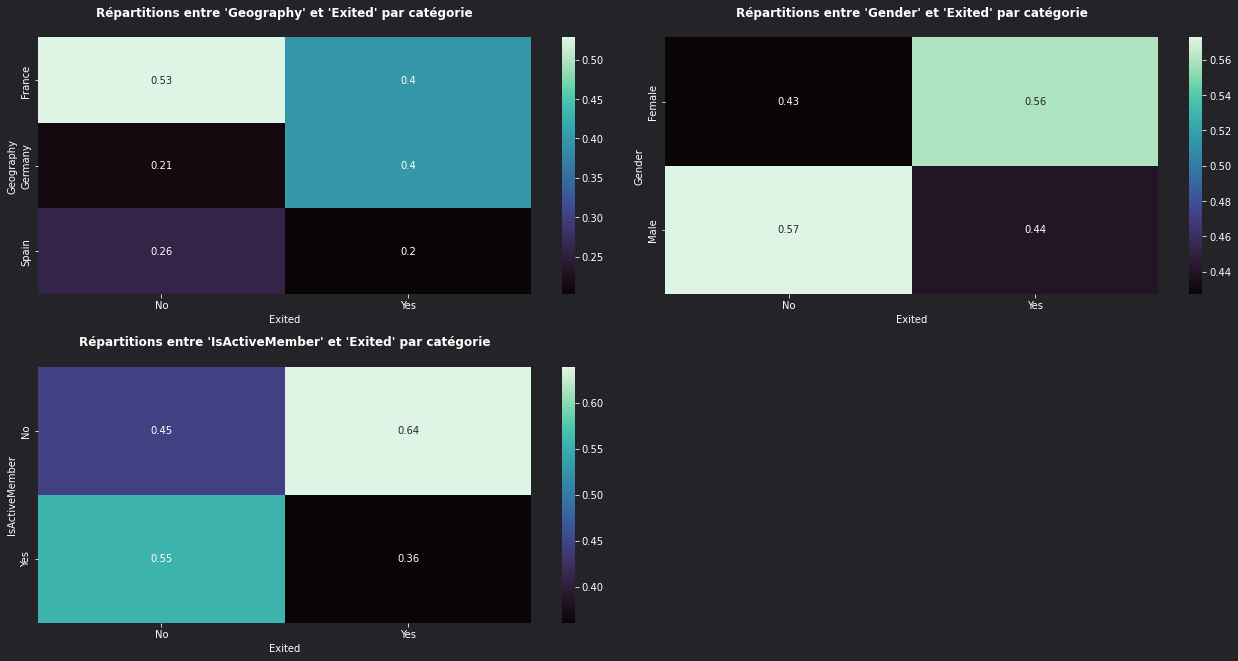

In [80]:
# (!) - Customers from Germany are likely to leave
# (!) - 'Gender' shows a little difference but not very significant
# (!) - Most of customers left the bank if 'IsActiveMember' is No
plt.figure(figsize=(18, 18), layout='tight')
for i, col in enumerate(categoricals) :
    ctb = pd.crosstab(churn_df[col], churn_df['Exited'], normalize='columns')
    plt.subplot(4, 2, i+1)
    plt.title(f"Répartitions entre '{col}' et 'Exited' par catégorie\n")
    sns.heatmap(ctb, annot=True, cmap='mako')
plt.show()

**Observations**

> —
> 
> ❕ Une plus grande proportion de clients français sont restés. Les clients d'Allemagne plus fréquents à quiter la banque. La distinction de `Gender` n'est pas très significative. Les clients ayant `IsActiveMember` = 'No' sont plus fréquents à quiter la banque.
> 
> —

##### **3.4** - Statistiques

Liens de corrélation

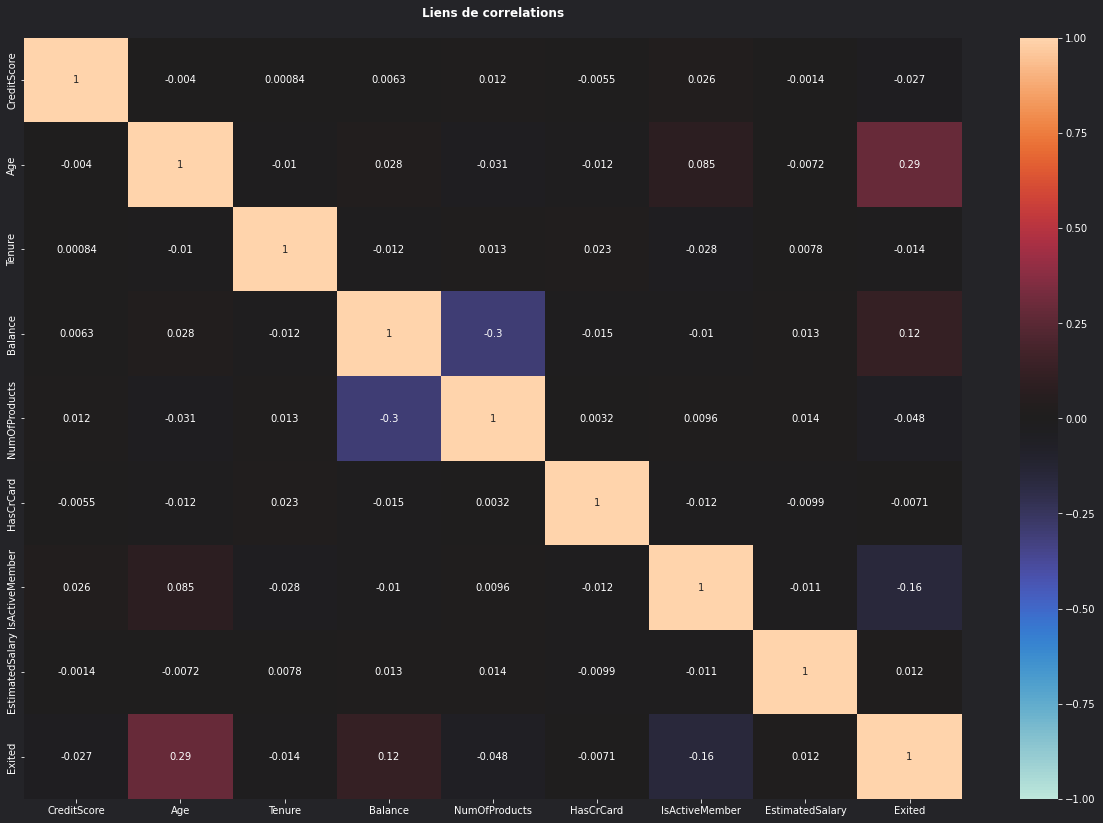

In [55]:
# (!) - Continous 'EstimatedSalary', 'CreditScore' && discretes 'Tenure', 'NumOfProduct', 'HasCreditCard' are all < 0.1| > -0.1
plt.figure(figsize=(21, 14))
plt.title("Liens de correlations\n")
sns.heatmap(churn_data.corr(method='pearson'), vmin=-1, vmax=1, cmap="icefire", annot=True)
plt.show()

Évaluations

In [104]:
# (!) - Inequal variance for 'Balance', 'Age', 'CreditScore'
for col in ['Balance', 'Age', 'CreditScore'] :
    print(col)
    display(pg.homoscedasticity(data=churn_data, dv=col, group='Exited'))

Balance


,W,pval,equal_var
levene,148.119576,7.746401e-34,False


Age


,W,pval,equal_var
levene,13.036807,0.000307,False


CreditScore


,W,pval,equal_var
levene,5.518729,0.018833,False


In [105]:
for col in ['Balance', 'Age', 'CreditScore'] :
    print(col)
    display(pg.welch_anova(data=churn_data, dv=col, between='Exited'))

Balance


,Source,ddof1,ddof2,F,p-unc,np2
0,Exited,1,3347.828453,155.532833,6.318664e-35,0.01405


Age


,Source,ddof1,ddof2,F,p-unc,np2
0,Exited,1,3248.052836,925.327559,4.712727e-179,0.081409


CreditScore


,Source,ddof1,ddof2,F,p-unc,np2
0,Exited,1,3050.895535,6.941436,0.008465,0.000734


In [106]:
for col in ['Balance', 'Age', 'CreditScore'] :
    print(col)
    display(pg.pairwise_gameshowell(data=churn_data, dv=col, between='Exited'))

Balance


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,0,1,72745.296779,91108.539337,-18363.242558,1472.442451,-12.47128,3347.828453,0.0,-0.309631


Age


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,0,1,37.408389,44.837997,-7.429608,0.244241,-30.419197,3248.052836,0.0,-0.755234


CreditScore


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,0,1,651.853196,645.351497,6.501699,2.467756,2.634661,3050.895535,0.008465,0.065412


In [107]:
# (!) - Equal variance only for 'EstimatedSalary'
display(pg.homoscedasticity(data=churn_data, dv='EstimatedSalary', group='Exited'))

display(pg.anova(data=churn_data, dv='EstimatedSalary', between='Exited'))

display(pg.pairwise_tukey(data=churn_data, dv='EstimatedSalary', between='Exited'))

,W,pval,equal_var
levene,0.918157,0.337982,True


,Source,ddof1,ddof2,F,p-unc,np2
0,Exited,1,9998,1.463262,0.22644,0.000146


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0,1,99738.391772,101465.677531,-1727.285759,1427.917632,-1.209654,0.22644,-0.030033


**Observations**

> — 
>
> ❕ Les variables continues `EstimatedSalary`, `CreditScore` et les discrètes `Tenure`, `NumOfProduct`, `HasCreditCard` enregistrent un lien de corrélation très faible lorsqu'elles sont croisées avec la cible (très proche de 0).
> 
> — 

---

### **4.** Finalisation

##### **4.1** - Conclusion

**Approche n°1** – ⛔️ Mauvais résultats 

✔️ Les variables `EstimatedSalary`, `Tenure`, et `HasCreditCard` seront supprimées parcequ'elles ont un très faible taux de corrélation avec la cible : `< .02` | `> -.02`. 

✔️ La variable `Gender` sera également supprimée parcequ'elle ne démontre pas de distinction suffisante avec la cible. 

In [6]:
version_1 = pd.read_csv('./_outputs/cm_test_v1.csv')
version_1.rename(columns={'Unnamed: 0': 'Test v.1'}, inplace=True)

version_1

,Test v.1,Yes,No
0,True Yes,243,252
1,True No,252,1747


**Approche n°2** – ⛔️ Mauvais résultats

✔️ Les variables `CreditScore`, et `NumOfProducts` seront également supprimées parcequ'elles ont également un faible taux de corrélation avec la cible : `< .01` | `> -.01`. 

In [7]:
version_2 = pd.read_csv('./_outputs/cm_test_v2.csv')
version_2.rename(columns={'Unnamed: 0': 'Test v.2'}, inplace=True)

version_2

,Test v.2,Yes,No
0,True Yes,185,216
1,True No,216,1783


**Approche n°3**

✔️ Suppression des variables `EstimatedSalary`, `CreditScore` et `HasCreditCard` parceque la différence entres leurs ecart-types est trop faible ainsi que leurs corrélations.

**Approche n°4**

✔️ Suppression de `EstimatedSalary` et `CreditScore` pour leurs faibles différences d'écart-type.

✔️ Maintien de la variables `HasCreditCard` et encodage en tant que catégorie.

##### **4.2** - Traitement

**Préparation**

In [18]:
# (!) - Extract from original 'churn_data'
churn_data['Exited'] = churn_data['Exited'].map(no_yes_v)

In [13]:
# (!) - Version 1
churn_prepare_1 = churn_data.drop(['EstimatedSalary', 'Tenure', 'HasCrCard', 'Gender'], axis=1)

churn_prepare_1.head(3)

,CreditScore,Geography,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,42,0.00,1,1,1
1,608,Spain,41,83807.86,1,1,0
2,502,France,42,159660.80,3,0,1


In [15]:
# (!) - Version 2
churn_prepare_2 = churn_prepare_1.drop(['CreditScore', 'NumOfProducts'], axis=1)

churn_prepare_2.head(3)

,Geography,Age,Balance,IsActiveMember,Exited
0,France,42,0.00,1,1
1,Spain,41,83807.86,1,0
2,France,42,159660.80,0,1


In [19]:
# (!) - Version 3
churn_prepare_3 = churn_data.drop(['EstimatedSalary', 'CreditScore', 'HasCrCard'], axis=1)

churn_prepare_3.head(3)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,France,Female,42,2,0.00,1,1,Yes
1,Spain,Female,41,1,83807.86,1,1,No
2,France,Female,42,8,159660.80,3,0,Yes


In [20]:
# (!) - Version 4
churn_prepare_4 = churn_data.drop(['EstimatedSalary', 'CreditScore'], axis=1)

churn_prepare_4.head(3)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,42,2,0.00,1,1,1,Yes
1,Spain,Female,41,1,83807.86,1,0,1,No
2,France,Female,42,8,159660.80,3,1,0,Yes


**Exportation**

In [11]:
churn_prepare_1.to_csv('./_datasets/churn_data_prepare_1.csv', index=False)

In [17]:
churn_prepare_2.to_csv('./_datasets/churn_data_prepare_2.csv', index=False)

In [21]:
churn_prepare_3.to_csv('./_datasets/churn_data_prepare_3.csv', index=False)

In [22]:
churn_prepare_4.to_csv('./_datasets/churn_data_prepare_4.csv', index=False)